### Comments
***This problem can be solved using BFS***

* My approach was to create a adjencey list graph using the diff between characters.
* After which I would traverse it.

### Complexity:

***Time***:O(b)

* Where b being the number of elements in the bank.

***Space***: O(b^2)

* If every mutation is exactly one character difference.

In [ ]:
from collections import deque


class Solution:
    def minMutation(self, startGene: str, endGene: str, bank: List[str]) -> int:
        if not endGene in bank:
            return -1

        adj_list = {}

        bank.append(startGene)

        for parrent in bank:
            adj_list[parrent] = []

            for gene in bank:
                diff = 0
                if parrent == gene:
                    continue
                for i in range(8):
                    diff += int(not (parrent[i] == gene[i]))

                if diff < 2:
                    adj_list[parrent].append(gene)

        visited = set()

        q = deque()

        q.append((startGene, 0))
        visited.add(startGene)

        while q:

            for i in range(len(q)):
                [curr, count] = q.popleft()

                if curr == endGene:
                    return count
                for gene in adj_list[curr]:
                    if not gene in visited:
                        q.append((gene, count + 1))
                        visited.add(gene)

        return -1

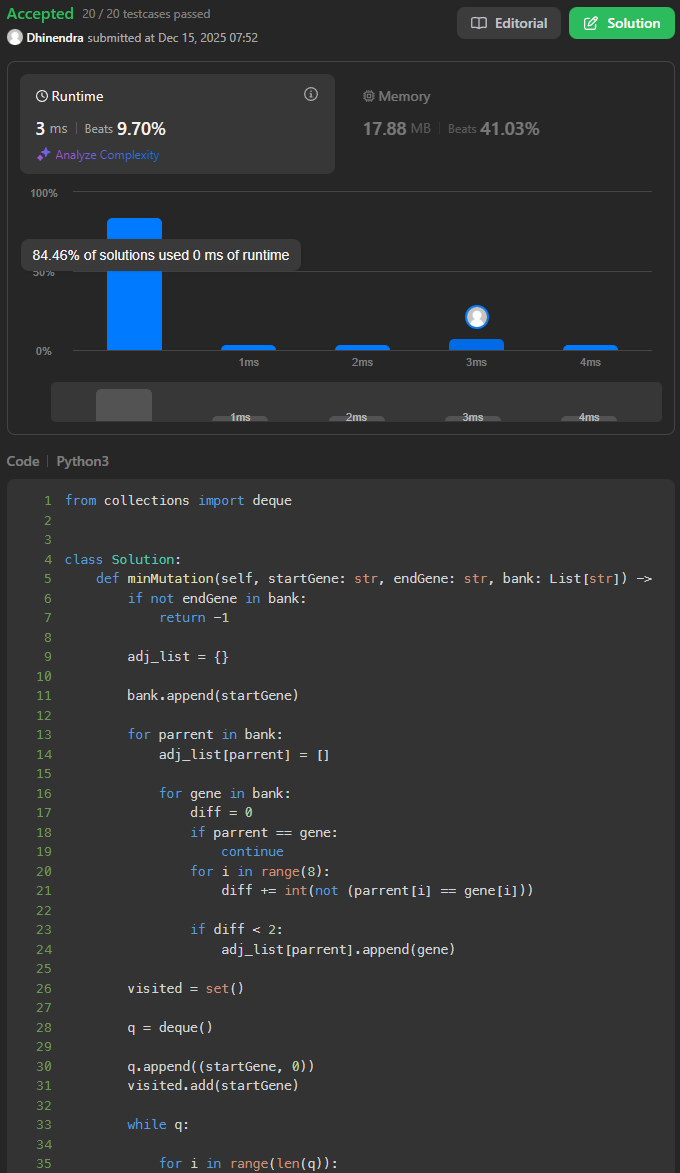

### Community References:


A much better solution without the need for the creation of a graph is this one from the community:

```
from collections import deque


class Solution:
    def minMutation(self, startGene: str, endGene: str, bank: List[str]) -> int:

        q = deque()

        q.append((startGene, 0))

        seen = set()

        while q:

            [node, count] = q.popleft()

            if node == endGene:
                return count

            for c in "ACGT":
                for i in range(len(node)):
                    neighbor = node[:i] + c + node[i + 1 :]
                    if neighbor in bank and not neighbor in seen:
                        q.append((neighbor, count + 1))
                        seen.add(neighbor)

        return -1
```

* This solution takes advanatage of several fix factors in the problem like the fixed number of possible mutations and bank.